In [655]:
import numpy as np     #imports the numpy library
import pandas as pd     #imports the pandas library
import matplotlib.pyplot as plt     #imports the matplotlib library

In [656]:
file_path = r"C:\Users\DELL\Downloads\Dataset_Cognifyz.csv" 
#This stores the file path to the dataset given as a variable

In [657]:
data = pd.read_csv(file_path) 
#This imports and reads the dataset given and stores it in a variable 

data.head()
#This outputs the first five rows of the dataset

,Restaurant_ID,Restaurant_Name,Country Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [659]:
data.shape

(9551, 21)

### INSIGHT
There are 9551 rows in this dataset and 21 columns. In these 21 columns, the column 'Cuisines' has 9542 non-null which means there are 9 null values. We take note of this during our analysis.

### DATA CLEANING FOR COLUMNS

In [662]:
data.dtypes.value_counts()

object     13
int64       5
float64     3
Name: count, dtype: int64

This means there are 13 columns with objects, 5 columns as integers and 3 columns as floats.

In [664]:
data['Price_range'].describe()
# Information about the Price_range column

count    9551.000000
mean        1.804837
std         0.905609
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Price_range, dtype: float64

In [665]:
data['Votes'].describe()
# Information about the Votes column

count     9551.000000
mean       156.909748
std        430.169145
min          0.000000
25%          5.000000
50%         31.000000
75%        131.000000
max      10934.000000
Name: Votes, dtype: float64

In [666]:
data['Aggregate_rating'].describe()
# Information about the Aggregate_rating column

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate_rating, dtype: float64

In [667]:
data['Has_Online_delivery'].unique()
# This confirms that we have only 'Yes' and 'No' values in this column

array(['No', 'Yes'], dtype=object)

In [668]:
data['Has_Table_booking'].unique()
# This confirms that we have only 'Yes' and 'No' values in this column

array(['Yes', 'No'], dtype=object)

In [669]:
data['Is_delivering_now'].unique()
# This confirms that we have only 'Yes' and 'No' values in this column

array(['No', 'Yes'], dtype=object)

In [670]:
data['Switch_to_order_menu'].unique()

array(['No'], dtype=object)

The column 'Switch_to_order_menu' has only one value all through which is 'No'

In [672]:
data['Rating_text'].value_counts()
# This shows the different unique values they have and their frequency

Rating_text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

# QUESTIONS


## LEVEL 1


### Task 1

Determine the top three most common cuisines in the dataset.

Calculate the percentage of restaurants that serve each of the top cuisines.

In [676]:
counts_cuisines = data['Cuisines'].str.split(', ').explode().value_counts()
counts_cuisines
# Stores as a variable a split and exploded cells of the Cuisine column

Cuisines
North Indian      3960
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Fish and Chips       1
Malwani              1
Cuisine Varies       1
Soul Food            1
B�_rek               1
Name: count, Length: 145, dtype: int64

In [677]:
counts_cuisines.head() # Outputs the first five rows
counts_cuisines_plot = counts_cuisines.head()
counts_cuisines_plot

Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Name: count, dtype: int64

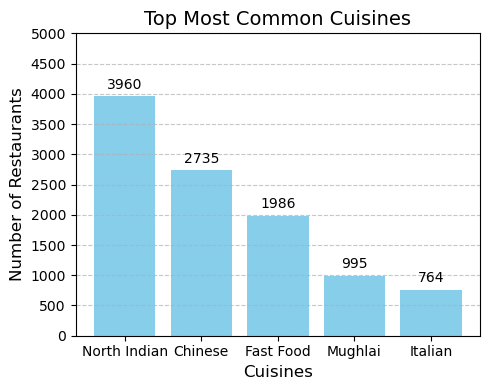

In [678]:
fig, ax = plt.subplots(figsize=(5,4)) # Defines the size of the plot
plot = ax.bar(counts_cuisines_plot.index,counts_cuisines_plot.values,color='skyblue') # Details about the plot
ax.bar_label(plot, labels=counts_cuisines_plot.values, padding=3, fontsize=10) # Writes the label of the value of each cuisine

# Editing the chart
plt.title('Top Most Common Cuisines', fontsize=14)
plt.xlabel('Cuisines', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.yticks(range(0, 5001, 500))
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the graph we observe that the three most common cuisines are **North Indian, Chinese** and **Fast Foods**

In [680]:
percentage_restaurant_cuisines = counts_cuisines/ len(data) * 100 # Divides the value of each cuisine by the length of the entire dataset which is the equal to the total number of restaurants and multiplies by 100
percentage_restaurant_cuisines

Cuisines
North Indian      41.461627
Chinese           28.635745
Fast Food         20.793634
Mughlai           10.417757
Italian            7.999162
                    ...    
Fish and Chips     0.010470
Malwani            0.010470
Cuisine Varies     0.010470
Soul Food          0.010470
B�_rek             0.010470
Name: count, Length: 145, dtype: float64

In [681]:
percentage_restaurant_cuisines_plot = percentage_restaurant_cuisines.round().head() # Rounds the values to the nearest whole numbers and outputs the first five rows
percentage_restaurant_cuisines_plot

Cuisines
North Indian    41.0
Chinese         29.0
Fast Food       21.0
Mughlai         10.0
Italian          8.0
Name: count, dtype: float64

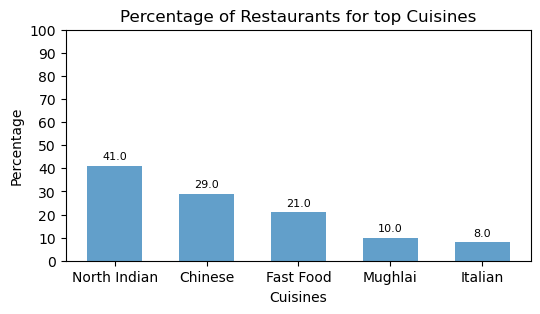

In [682]:
fig, ax = plt.subplots(figsize=(6,3)) # Defines the size of the plot
plot_2 = ax.bar(percentage_restaurant_cuisines_plot.index, percentage_restaurant_cuisines_plot.values, width=0.6, alpha=0.7) # Details about the plot
ax.bar_label(plot_2, labels=percentage_restaurant_cuisines_plot.values, padding=3, fontsize=8)  # Writes the label of the percentage of restaurants for each top cuisine

# Editing the chart
plt.title('Percentage of Restaurants for top Cuisines', fontsize=12)
plt.xlabel('Cuisines', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.yticks(range(0, 101, 10))
plt.show()

We observe that **41%** of restaurants offer **North Indian** Cuisines, **29%** of restaurants offer **Chinese** Cuisines and **21%** of restaurants offer **Fast Food** Cuisines.

### Task 2

Identify the city with the highest number of restaurants in the dataset.

Calculate the average rating for restaurants in each city.

Determine the city with the highest average rating.

In [685]:
city = data['City'].value_counts().head() # Counts the number of unique values and outputs the first five rows
city

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64

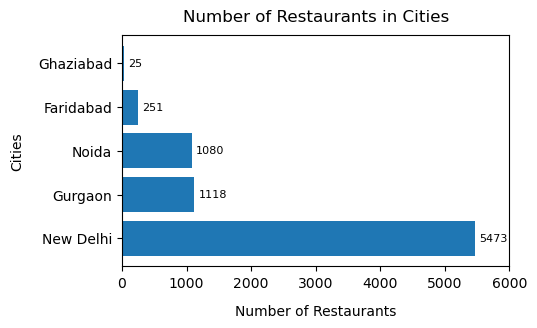

In [686]:
fig, ax = plt.subplots(figsize=(5,3)) # Defines the size of the plot
plot_3 = ax.barh(city.index, city.values) # Details about the plot
ax.bar_label(plot_3, labels=city.values, padding=3, fontsize=8) # Writes the value of the number of restaurants in each city

# Editing the chart
plt.title('Number of Restaurants in Cities', fontsize=12, pad=10)
plt.xticks(range(0, 6001, 1000))
plt.xlabel('Number of Restaurants', fontsize=10,labelpad=10)
plt.ylabel('Cities', fontsize=10, labelpad=10)

plt.show()

We observe that the cities with the highest number of restaurants are **New Delhi**, **Gurgaon** and **Noida**

In [688]:
avg_aggr_rating = data.groupby('City')['Aggregate_rating'].mean().round(2).copy() # Calculates the mean of the Aggregate_rating of each City and rounds up to 2 decimal places
avg_aggr_rating = avg_aggr_rating.reset_index() # Resets the index such that the Series is converted to a Dataframe
avg_aggr_rating

,City,Aggregate_rating
0,Abu Dhabi,4.30
1,Agra,3.96
2,Ahmedabad,4.16
3,Albany,3.56
4,Allahabad,3.40
...,...,...
136,Weirton,3.90
137,Wellington City,4.25
138,Winchester Bay,3.20
139,Yorkton,3.30


Above is the table that calculates the average aggregate rating of each city

In [690]:
avg_aggr_rating.loc[avg_aggr_rating['Aggregate_rating'].idxmax()] # Outputs the row with the highest average aggregate rating

City                Inner City
Aggregate_rating           4.9
Name: 56, dtype: object

The City with the highest average aggregate rating as shown above is Inner City with a value of 4.9

### Task 3
Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

Calculate the percentage of restaurants in each price range category.

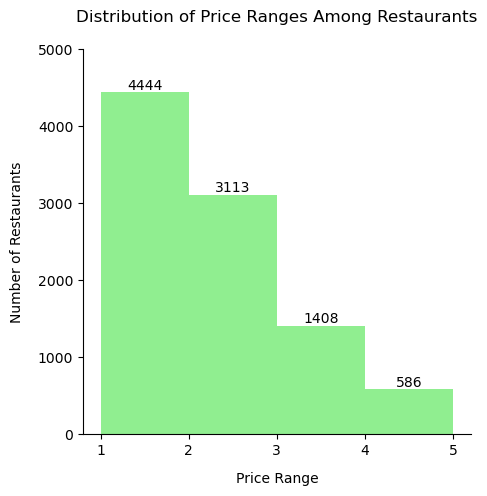

In [693]:
fig, ax = plt.subplots(figsize=(5,5)) # Defines the size of the plot
n, bins, patches = ax.hist(data['Price_range'], bins=range(1, data['Price_range'].max() + 2), color='lightgreen') # Details of the plot

# This for loop is used to place the label of the value of number of restaurants on each bar
for i in range(len(n)):
    plt.text(bins[i] + 0.5, n[i], str(int(n[i])), ha='center', va='bottom', fontsize=10) 

# Eliminates the top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Editing the chart
plt.title('Distribution of Price Ranges Among Restaurants', pad=20)
plt.xlabel('Price Range', labelpad=10)
plt.ylabel('Number of Restaurants', labelpad=10)
plt.xticks(range(1, data['Price_range'].max() + 2, 1))
plt.yticks(range(0, 5001, 1000))
plt.show()


The Chart above visualizes the distribution of Price ranges among restaurants

In [695]:
percent_price_range = data['Price_range'].value_counts() / len(data) * 100 # Divides the value_count of unique each price range by the length of the entire dataset which is the same as the total number of restaurants and multiplies by 100
percent_price_range = percent_price_range.reset_index().round(2) # Rounds up the values to 2 decimal places and resets the index such that the Series is converted into a Dataframe
percent_price_range.columns = ['Price_range', 'Percentage(%)'] # Changes the names of the columns of the new dataframe
percent_price_range 

,Price_range,Percentage(%)
0,1,46.53
1,2,32.59
2,3,14.74
3,4,6.14


The result shows that **46.53%** of restaurants have a price range of **1**, **32.59%** a price range of **2**, **14.74%** a price range of **3** and **6.14%** a price range of **4**

### Task 4

Determine the percentage of restaurants that offer online delivery.

Compare the average ratings of restaurants with and without online delivery.

In [698]:
online_delivery = data['Has_Online_delivery'].value_counts() / len(data) * 100 # Divides the value_count of each unique online delivery option by the length of the entire dataset which is the same total number of restaurants and mulitplies by 100
online_delivery = online_delivery.reset_index().round(2) # Rounds up the values to 2 decimal places and resets the index such that the Series is converted to a Dataframe
online_delivery.columns = ['Has_Online_delivery', 'Percentage(%)'] # Renames the columns of the new dataframe
online_delivery

,Has_Online_delivery,Percentage(%)
0,No,74.34
1,Yes,25.66


The result shows that **74.34%** of restaurants have online delivery while **25.66%** of restaurants do not.

In [700]:
delivery_aggr_rating = data.groupby('Has_Online_delivery')['Aggregate_rating'].mean().round(2) # Calculates the mean of the aggregate ratings of each unique online delivery option
delivery_aggr_rating = delivery_aggr_rating.reset_index() # Resets the index such that the Series is converted to a Dataframe
delivery_aggr_rating.columns = ['Has_Online_delivery', 'Average_Aggregate_rating'] # Renames the column of the new dataframe
delivery_aggr_rating

,Has_Online_delivery,Average_Aggregate_rating
0,No,2.47
1,Yes,3.25


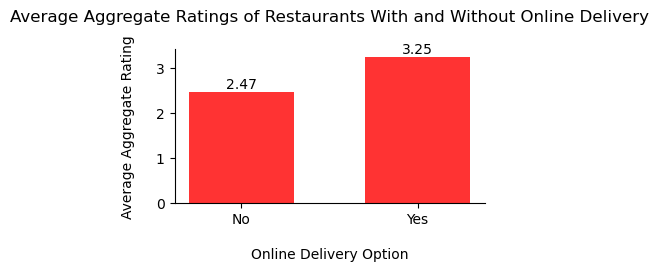

In [701]:
fig, ax = plt.subplots(figsize = (4,2)) # Defines the size of the plot
plot_5 = ax.bar(delivery_aggr_rating['Has_Online_delivery'], delivery_aggr_rating['Average_Aggregate_rating'], width = 0.6, color='red', alpha=0.8) # Details of the plot
ax.bar_label(plot_5, labels=delivery_aggr_rating['Average_Aggregate_rating']) # Writes the label of the values of the average aggregate rating of each online delivery option 

# Eliminates the top and right border of the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Editing the chart
plt.title('Average Aggregate Ratings of Restaurants With and Without Online Delivery', pad=20)
plt.xlabel('Online Delivery Option', labelpad=15)
plt.ylabel('Average Aggregate Rating', labelpad=15)

plt.show()

The result show that restaurants with the option of online delivery have an **average aggregate rating** of **3.25** and restaurants without the option of online delivery have an **average aggregate rating** of **2.47**

## LEVEL 2

### Task 1

Analyze the distribution of aggregate ratings and determine the most common rating range.

Calculate the average number of votes received by restaurants.


In [705]:
rating_bins = [0, 1, 2, 3, 4, 5]  
rating_labels = ['0-1', '1-2', '2-3', '3-4', '4-5']

rating_range = pd.cut(data['Aggregate_rating'], bins = rating_bins, labels = rating_labels, right=False) 
rating_range = rating_range.value_counts()
rating_range

Aggregate_rating
3-4    4590
0-1    2148
2-3    1430
4-5    1380
1-2       3
Name: count, dtype: int64

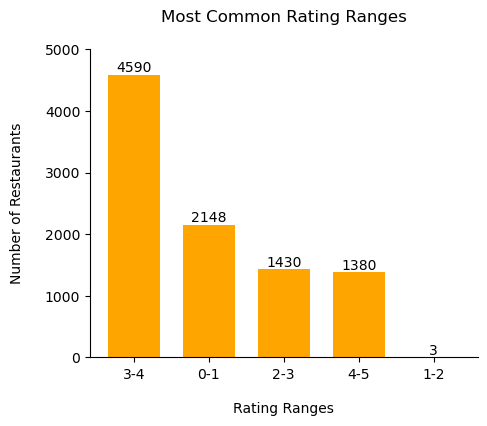

In [706]:
fig, ax = plt.subplots(figsize=(5,4)) # Defines the plot
plot_6 = ax.bar(rating_range.index, rating_range.values, color='orange', width=0.7) # Details of the plot
ax.bar_label(plot_6, labels=rating_range.values) # Writes the label of the values of the number of restaurants on each bar

# Eliminates the top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Editing the chart
plt.title("Most Common Rating Ranges", pad=20)
plt.xlabel("Rating Ranges", labelpad=15)
plt.ylabel("Number of Restaurants", labelpad=15)
plt.xticks(rotation=0)
plt.yticks(range(0,5001,1000))
plt.show()

The chart above shows the distribution of aggregating among restaurants. The most common rating range is the range of rating from **3-4**

### Task 2

Identify the most common combinations of cuisines in the dataset.

Determine if certain cuisine combinations tend to have higher ratings.

In [709]:
cuisines = data['Cuisines'].dropna() # Eliminates all null values in the column
df_cuisines = cuisines[cuisines.str.split(',').str.len() > 1].value_counts().reset_index() # Splits the Cuisines columns at the point of the ',', counts the length and then outputs only the Cuisines with length greater than 1
df_cuisines

,Cuisines,count
0,"North Indian, Chinese",511
1,"North Indian, Mughlai",334
2,"North Indian, Mughlai, Chinese",197
3,"Bakery, Desserts",170
4,"Pizza, Fast Food",131
...,...,...
1726,"South Indian, Desserts, Beverages",1
1727,"Healthy Food, North Indian, Italian, Salad",1
1728,"Bengali, Fast Food",1
1729,"North Indian, Rajasthani, Asian",1


The table above shows that the most common combination of cuisines are **North Indian** and **Chinese** cuisines

### Task 3

Plot the locations of restaurants on a map using longitude and latitude coordinates.

Identify any patterns or clusters of restaurants in specific areas.

### Task 4

Identify if there are any restaurant chains present in the dataset.

Analyze the ratings and popularity of different restaurant chains.

In [713]:
chains = data['Restaurant_Name'].value_counts() # Stores the value_count of each unique restaurant name
restaurant_chains = chains[chains > 1] # Stores the value_count of each unique restaurant name that appears more than once
restaurant_chains

Restaurant_Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
                      ..
Town Hall              2
Halki Aanch            2
Snack Junction         2
Delhi Biryani Hut      2
Beliram Degchiwala     2
Name: count, Length: 734, dtype: int64

The result shows that there are indeed restaurant chains in the dataset.z


In [715]:
chains_avg_aggr_rating = data[data['Restaurant_Name'].isin(restaurant_chains.index)].groupby('Restaurant_Name')['Aggregate_rating'].mean() # Calculates the mean of the aggregate rating of unique restaurant names which appear more than once
chains_avg_aggr_rating

Restaurant_Name
10 Downing Street       4.000000
221 B Baker Street      3.366667
34 Parkstreet Lane      3.050000
34, Chowringhee Lane    2.791667
4700BC Popcorn          3.500000
                          ...   
Zaika                   2.850000
Zaika Kathi Rolls       1.500000
Zizo                    3.866667
Zooby's Kitchen         3.150000
bu��no                  3.750000
Name: Aggregate_rating, Length: 734, dtype: float64

In [716]:
chains_total_votes = data[data['Restaurant_Name'].isin(restaurant_chains.index)].groupby('Restaurant_Name')['Votes'].sum() # Calculates the total number votes of each unique restaurant name which appear more than once 
chains_total_votes


Restaurant_Name
10 Downing Street        670
221 B Baker Street       215
34 Parkstreet Lane        31
34, Chowringhee Lane     777
4700BC Popcorn           176
                        ... 
Zaika                    245
Zaika Kathi Rolls         16
Zizo                    1371
Zooby's Kitchen           52
bu��no                   117
Name: Votes, Length: 734, dtype: int64

In [717]:
chain_data = pd.DataFrame({
    'Average_Rating': chains_avg_aggr_rating,
    'Total_Votes': chains_total_votes
}) # Combines two Series to form a Dataframe
chain_data = chain_data.reset_index() # Resets the index of the new Dataframe such that the index is now different
chain_data

,Restaurant_Name,Average_Rating,Total_Votes
0,10 Downing Street,4.000000,670
1,221 B Baker Street,3.366667,215
2,34 Parkstreet Lane,3.050000,31
3,"34, Chowringhee Lane",2.791667,777
4,4700BC Popcorn,3.500000,176
...,...,...,...
729,Zaika,2.850000,245
730,Zaika Kathi Rolls,1.500000,16
731,Zizo,3.866667,1371
732,Zooby's Kitchen,3.150000,52


The table above shows the analysis of restaurant chains, the average aggregate rating of each and their total votes-expressing their popularity.